<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB
None
  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Austral

<ipython-input-4-16b06166d28c>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_score'].fillna('No Score', inplace=True)
<ipython-input-4-16b06166d28c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_type', palette='viridis')


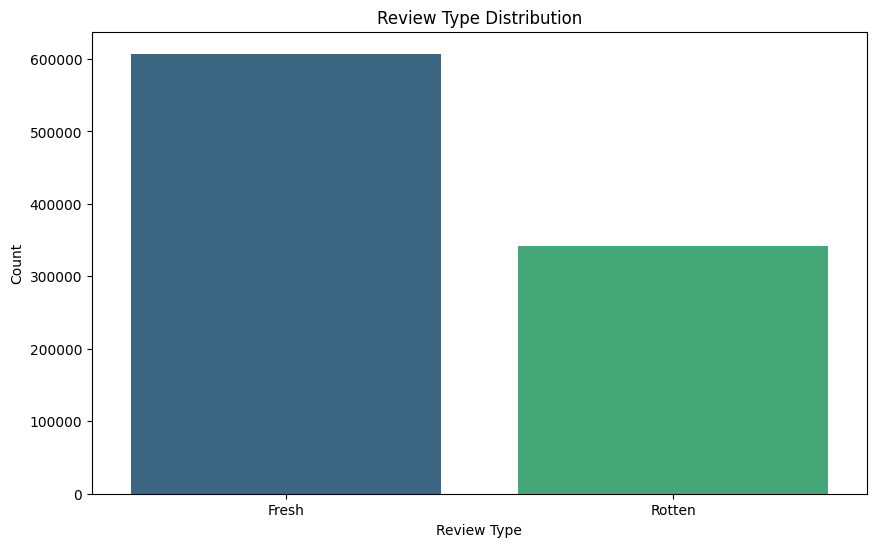

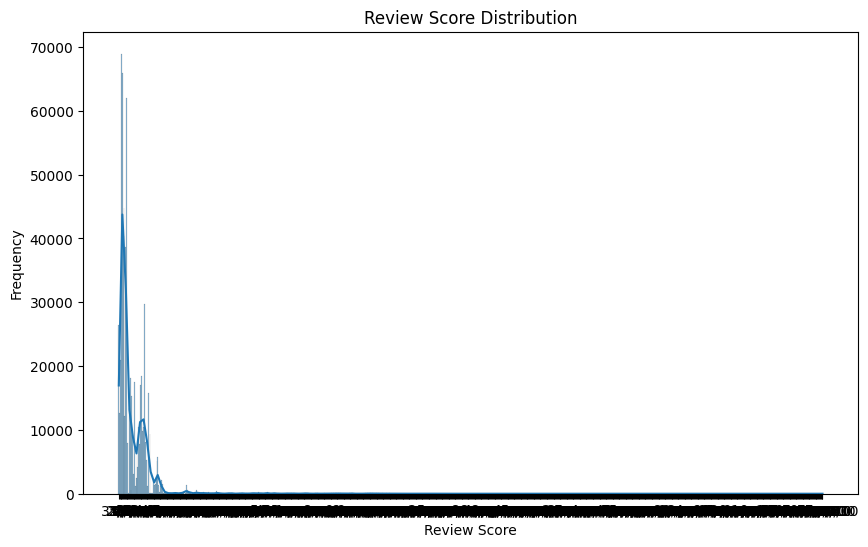

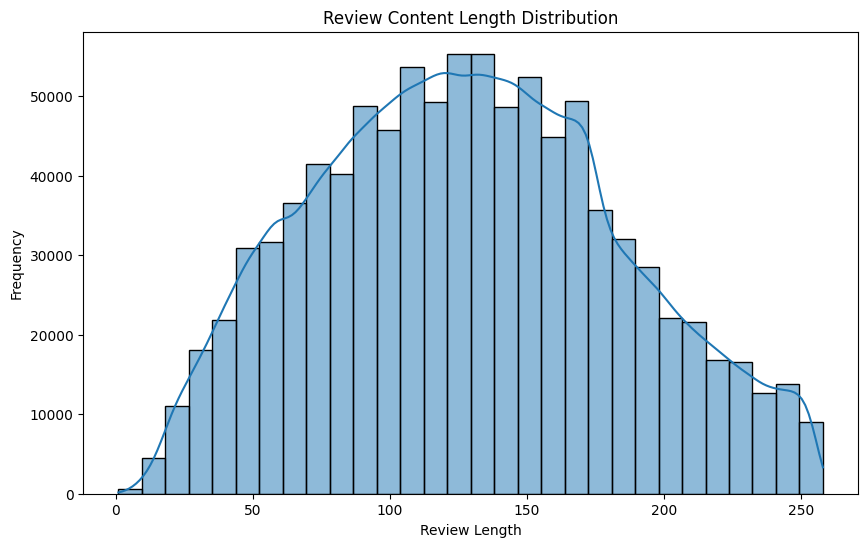

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')

# 查看数据基本信息
print(df.info())
print(df.head())

# 数据清理
# 去除缺失值（去除缺少评论内容的行）
df.dropna(subset=['review_content'], inplace=True)

# 去除重复的评论
df.drop_duplicates(subset=['review_content'], inplace=True)

# 填补评分缺失值（如果适用，可以将缺失的评分替换为一个默认值，例如0）
df['review_score'].fillna('No Score', inplace=True)

# 数据可视化
# 评论类型分布（Fresh和Rotten）
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='review_type', palette='viridis')
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

# 评论分数分布（去除缺失值并绘制评分的直方图）
df_valid_scores = df[df['review_score'] != 'No Score']
plt.figure(figsize=(10, 6))
sns.histplot(df_valid_scores['review_score'], bins=20, kde=True)
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

# 评论内容长度分布
df['review_length'] = df['review_content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Content Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()
df.to_csv('rotten_tomatoes_critic_reviews_new.csv', index=False)